# - 주제

지난 수십 년간 한국이 경험한 심각한 경제 위기는 1997년 외환위기와 2008년 금융위기를 꼽을 수 있음

경제 위기가 발생하는 원인은 단순히 한두 개의 지표만으로 설명할 수 없음

수많은 경제 지표를 종합적으로 살펴보아야 경제 위기 직전에 나타나는 작은 전조를 알아챌 가능성이 생김

현재 전문가들은 2022년의 상황이 과거(1997년 외환위기, 2008년 금융위기)의 심각한 경제 위기에 비견될만한 상황이 될 가능성에 대해 경고

이러한 상황에서 현재의 상황이 어떻게 발전될 가능성이 높은지 예측해볼 것

# - 전개 순서
### Ⅰ. 텍스트 분석 및 결과시각화

경제 뉴스를 텍스트 분석하고 그 결과를 시각화하여 현재 상황에 대한 전반적인 분위기 파악

### Ⅱ. 데이터 수집 및 전처리

지난 30년간 한국의 경제 지표뿐만 아니라 주변국(일본, 중국)과 세계 경제에 가장 큰 영향력을 끼치는 미국의 데이터도 수집

수집한 데이터를 분석에 용이하게 전처리

### Ⅲ. 데이터 분석 및 시각화

과거 두 건의 경제 위기(1997년 외환위기, 2008년 금융위기)와 현재의 지표를 비교하고 분석하여 시각화

### Ⅳ. 회귀분석

현재가 1997년 외환위기와 2008년 금융위기 중 어느 시기와 유사한 추세를 보이는지, 혹은 심각한 경제 위기가 아니라 일시적인 현상인지 알아볼 것

### V. 결론

결론 도출

In [98]:
# 기본
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 크롤링
import requests
from urllib import request
from bs4 import BeautifulSoup

# 텍스트 분석
import json
import re
from collections import Counter
from konlpy.tag import Okt
from wordcloud import WordCloud
from functools import reduce

# # 한글(for Mac)
# from matplotlib import rc
# import sys
# rc('font', family='AppleGothic')
# plt.rcParams['axes.unicode_minus'] = False

# 한글(for windows)
import matplotlib.font_manager as fm
import matplotlib
font_loc = 'C:/Windows/Fonts/malgun.ttf'
font_name = fm.FontProperties(fname=font_loc).get_name()
matplotlib.rc('font', family=font_name)

# '-' 부호 깨지는 것 방지
plt.rcParams['axes.unicode_minus'] = False

# 컬럼 표시 제한
#pd.set_option('display.max_row', None)
pd.set_option('display.max_columns', None)

#  차트 설정
plt.rcParams["figure.figsize"] = (20, 10)
plt.rcParams['lines.linewidth'] = 3
plt.rcParams["axes.grid"] = True
plt.rcParams['axes.linewidth'] = 2.0

# 경고 문구 off
import warnings
warnings.filterwarnings('ignore')

# Ⅰ. 텍스트 분석 및 결과 시각화

#### 22년 08월 매일 450개씩 약 14000개 기사 제목 분석 결과

In [2]:
# 뉴스기사 제목 크롤링
# 2022년 8월 한달간 경제 관련 기사의 제목 텍스트 분석

# title_list22 = []
# for i in range(1, 301, 10):
#     for j in range(1, 32):
#         url = f'https://news.daum.net/breakingnews/economic?page={i}&regDate=202208{j}'
#         html = requests.get(url)
#         soup = BeautifulSoup(html.text, 'html.parser')
        
#         news_data = soup.select('div > ul > li > div > strong > a')
#         title_list22 += [news.text.strip() for news in news_data]

# title22 = set(title_list22) # 중복되는 기사 제목이 많아서 set 변환으로 중복 제거
# title22 = list(title22) # 다시 리스트 형태로 변환

In [3]:
# 단어 추출 및 카운트

# temp = [i.split() for i in title22]
# temp = reduce(lambda x,y : x+y, temp)
# temp = [re.sub(r'[^\w]',' ',w) for w in temp]
# temp =[w for w in temp if len(w) > 1]
# temp_count = Counter(temp)
# temp_count = dict(temp_count.most_common(100))
# temp_count.keys()

In [4]:
# # 제거 단어 선정
# remove_list = ['2022','8월', '특징주', '정부', '코스피', '최대', '상반기', '출시', '추석', '지원', '2분기', '만에', '규모', '개최', '국내', '가격', '진행', '피해', '연속', '서비스', '아파트', '서울', '영업익', '매출', '시장', '판매', '확대', '체결', '할인', '마감', '선정', '전기차', '위한', '것', '강화', '포토', '추진', '오픈', '공개', '위해', '다시', '협력']

In [5]:
# # Text Cloud 출력
# showTextCloud(title22, remove_list)

#### 21년 08월 매일 450개씩 약 14000개 기사 제목 분석 결과

In [6]:
# 뉴스기사 제목 크롤링
# 2021년 8월 한달간 경제 관련 기사의 제목 텍스트 분석

# title_list21 = []
# for i in range(1, 301, 10):
#     for j in range(1, 32):
#         url = f'https://news.daum.net/breakingnews/economic?page={i}&regDate=202108{j}'
#         html = requests.get(url)
#         soup = BeautifulSoup(html.text, 'html.parser')
        
#         news_data = soup.select('div > ul > li > div > strong > a')
#         title_list21 += [news.text.strip() for news in news_data]

# title21 = set(title_list21) # 중복되는 기사 제목이 많아서 set 변환으로 중복 제거
# title21 = list(title21) # 다시 리스트 형태로 변환

In [7]:
# 단어 추출 및 카운트

# temp = [i.split() for i in title21]
# temp = reduce(lambda x,y : x+y, temp)
# temp = [re.sub(r'[^\w]',' ',w) for w in temp]
# temp =[w for w in temp if len(w) > 1]
# temp_count = Counter(temp)
# temp_count = dict(temp_count.most_common(100))
# temp_count.keys()

In [8]:
# # 제거 단어 선정
# remove_list = ['백신', '2021', '8월', '특징주', '정부','코스피', '출시', '규모', '최대', '2분기', '상반기', '서비스', '지원', '만에', '개최', '국내', '시장', '코로나19', '것', '추석', '체력', '진행', '오픈', '서울', '신규', '연속', '영업익', '사업', '위한', '9월', '전기차']

In [9]:
# Text Cloud 출력
# showTextCloud(title21, remove_list)

In [99]:
# 네이버 기사 검색 API를 DataFrame으로 변환하는 함수
def api_article_search(search):
    client_id = "2oMII3aNFw4Ixrv4yTLR"
    client_secret = "RxaobQ9vnZ"

    query = urllib.parse.quote(search)
    idx = 0
    display = 100 
    start = 1
    end = 1000
    sort = 'date'

    news_df = pd.DataFrame(columns=("Title", "Original Link", "Link", "Description", "Publication Date"))

    for start_index in range(start, end, display):

        url = "https://openapi.naver.com/v1/search/news?query=" + query \
              + "&display=" + str(display) \
              + "&start=" + str(start_index) \
              + "&sort=" + sort

        request = urllib.request.Request(url)
        request.add_header("X-Naver-Client-Id",client_id)
        request.add_header("X-Naver-Client-Secret",client_secret)
        response = urllib.request.urlopen(request)
        rescode = response.getcode()
        if(rescode==200):
            response_body = response.read()
            response_dict = json.loads(response_body.decode('utf-8'))
            items = response_dict['items']
            for item_index in range(0, len(items)):
                remove_tag = re.compile('<.*?>')
                title = re.sub(remove_tag, '', items[item_index]['title'])
                original_link = items[item_index]['originallink']
                link = items[item_index]['link']
                description = re.sub(remove_tag, '', items[item_index]['description'])
                pub_date = items[item_index]['pubDate']
                news_df.loc[idx] = [title, original_link, link, description, pub_date]
                idx += 1
        else:
            print("Error Code:" + rescode)

    return news_df

In [100]:
news_dfs = api_article_search('레이 달리오 예측')
news_df1 = news_dfs[news_dfs['Publication Date'].str.contains('2022', 'Aug')]
news_df2 = news_dfs[news_dfs['Publication Date'].str.contains('2022', 'Jul')]
news_df = pd.concat([news_df1, news_df2])

NameError: name 'urllib' is not defined

In [ ]:
news_df.info()

In [ ]:
# 기사 제목 변수에 입력
df1_title = news_df['Title']

In [ ]:
# 특수문자 제거하기
compile = re.compile("[^ ㄱ-ㅣ가-힣]+")
list_title=[]
for i in range(len(df1_title.values)):
    a = compile.sub("",df1_title.values[i])
    list_title.append(a)

In [ ]:
# 문장분석
okt = Okt()
result =[]
result = [okt.nouns(i) for i in list_title] #명사만 추출
final_result= [r for i in result for r in i]

In [ ]:
# 텍스트에서 많이 나온 단어
temp =[w for w in final_result if len(w) > 1]
temp_count = Counter(temp)
temp_count = dict(temp_count.most_common(100))
temp_count.keys()

In [ ]:
# 불용어 제거하기
remove_list = ['레이', '헤지펀드', '최대', '사이클', '뉴스', '신간', '거물', '추가', '빅사', '오전', '주요']

In [ ]:
# 워드 클라우드 정의 함수
def showTextCloud(listValue:list, remove_list:list, count = 0):
    temp =[w for w in final_result if len(w) > 1]
    temp = [w for w in temp if not np.any([w[-10:] in remove_list, w[-1] in remove_list])]
    temp_count = Counter(temp)
    if count != 0:     
        temp_count = dict(temp_count.most_common(count)) # 상위 count개
    wc = WordCloud(font_loc ,background_color='white',width=800,height=600)
    cloud = wc.generate_from_frequencies(temp_count)
    plt.imshow(cloud)
    plt.axis('off')
    plt.show()

In [ ]:
# 워드 클라우드 출력
showTextCloud(final_result, remove_list)

In [ ]:
news_df1 = api_article_search('누리엘 루비니 예측')
news_df1 = news_df1[news_df1['Publication Date'].str.contains('2022', 'Aug')]
news_df2 = news_df1[news_df1['Publication Date'].str.contains('2022', 'Jul')]
news_df = pd.concat([news_df1, news_df2])
news_df = pd.concat([news_df1, news_df2])

df1_title = news_df['Title']

compile = re.compile("[^ ㄱ-ㅣ가-힣]+")
list_title=[]
for i in range(len(df1_title.values)):
    a = compile.sub("",df1_title.values[i])
    list_title.append(a)

remove_list = ['닥터', '루비', '세계', '내년', '교수', '착륙', '칼럼', '역대', '뉴스', '상반기', '추가']

okt = Okt()
result =[]
result = [okt.nouns(i) for i in list_title] #명사만 추출
final_result= [r for i in result for r in i]

showTextCloud(final_result, remove_list)


In [ ]:
temp =[w for w in final_result if len(w) > 1]
temp_count = Counter(temp)
temp_count = dict(temp_count.most_common(100))
temp_count.keys()

# Ⅱ. 데이터 전처리

## 1. 금리 데이터

In [10]:
# 데이터 불러오기
df_interest = pd.read_excel('./data/interest rate.xlsx')

# 불필요 칼럼 제거
df_interest = df_interest.drop(columns = 'Unnamed: 0')
df_interest.head()

,연월,미국_금리(%),일본_금리(%),중국_금리(%),한국_금리(%)
0,1995/01,5.5,1.75,12.06,14.01
1,1995/02,6.0,NaN,NaN,NaN
2,1995/03,NaN,NaN,NaN,NaN
3,1995/04,NaN,1.00,NaN,NaN
4,1995/05,NaN,NaN,NaN,13.51


In [11]:
# 데이터 확인
df_interest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 332 entries, 0 to 331
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   연월        332 non-null    object 
 1   미국_금리(%)  102 non-null    float64
 2   일본_금리(%)  17 non-null     float64
 3   중국_금리(%)  82 non-null     float64
 4   한국_금리(%)  119 non-null    float64
dtypes: float64(4), object(1)
memory usage: 13.1+ KB


In [12]:
# 결측데이터 확인
df_interest.isna().sum()

# 결측데이터를 앞의 데이터로 채우기 → 금리를 새로 공시하기 전까지는 이전에 공시한 금리를 유지하기 때문
df_interest.fillna(method = 'ffill', inplace=True)

# 결측데이터 확인
df_interest.isna().sum()

연월          0
미국_금리(%)    0
일본_금리(%)    0
중국_금리(%)    0
한국_금리(%)    0
dtype: int64

In [13]:
# 인덱스 리셋
df_interest.reset_index(drop=True, inplace=True)

# 최종 파일 excel로 변환하여 저장
df_interest.to_excel('./data/금리.xlsx')

## 2. 무역수지/외채 관련 데이터

In [14]:
# 데이터 불러오기
df_debt = pd.read_excel('./data/other_data.xlsx')

# 불필요 칼럼 제거
df_debt = df_debt.drop(['Unnamed: 0','연월'], axis=1)
df_debt.head()

,무역수지(달러),총외채(달러),단기외채(달러),단기외채/외환보유액,단기외채/총외채
0,-1201000000,80800000000,36200000000,1.790688,0.448020
1,-1462000000,80800000000,36200000000,1.782530,0.448020
2,-1668000000,80800000000,36200000000,1.771330,0.448020
3,-934000000,89200000000,41900000000,1.995662,0.469731
4,-1171000000,89200000000,41900000000,1.958120,0.469731


In [15]:
# 데이터 확인
df_debt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 332 entries, 0 to 331
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   무역수지(달러)    332 non-null    int64  
 1   총외채(달러)     332 non-null    int64  
 2   단기외채(달러)    332 non-null    int64  
 3   단기외채/외환보유액  332 non-null    float64
 4   단기외채/총외채    332 non-null    float64
dtypes: float64(2), int64(3)
memory usage: 13.1 KB


In [16]:
# 인덱스 리셋
df_debt.reset_index(drop=True, inplace=True)

# 최종 파일 excel로 변환하여 저장
df_debt.to_excel('./data/무역수지_외채.xlsx')

## 3. 기타 경제 지표 데이터

In [17]:
# 데이터 불러오기
df_rest = pd.read_excel('./data/change.xlsx')

# 불필요 칼럼 제거
df_rest = df_rest.drop(columns = 'Unnamed: 0')
df_rest.head()

,연월,원/미국달러(매매기준율),원/위안(매매기준율),원/일본엔(100엔),달러_인덱스,Brent(U$/bbl),금($/OZ),미국(NASDAQ)1980.1.4=100,일본(NIKKEI)1980.1.4=100,중국(SHCOMP)1980.1.4=100,한국(KOSPI)(1980.1.4=100),가상화폐(달러),미국_소비자물가지수(2010=100),일본_소비자물가지수(2010=100),중국_소비자물가지수(2010=100),한국_소비자물가지수(2010=100),일본_외화보유액(백만달러),중국_외화보유액(백만달러),한국_외화보유액(백만달러),미국_경제성장률(%),일본_경제성장률(%),중국_경제성장률(%),한국_경제성장률(%),경상수지(달러),미국_실업률(%),일본_실업률(%),한국_실업률(%),미국장단기(국채)금리차,외채비율(%),미국_1인당_국민소득(달러),일본_1인당_국민소득(달러),중국_1인당_국민소득(달러),한국_1인당_국민소득(달러)
0,1995/01,786.7,93.548540,791.65,88.03,17.05,375.1,755.20,18649.82,562.59,925.56,NaN,68.93,101.33,71.41,58.87,183250,75377,25634400,2.7,2.6,11.0,9.6,-1209000000,5.6,3.0,2.1,0.34,0.470935,29040,42570,540,11820
1,1995/02,786.0,93.659190,809.47,85.92,17.22,377.1,793.74,17053.43,549.26,885.69,NaN,69.20,101.02,72.06,59.11,183250,75377,25752333,2.7,2.6,11.0,9.6,-1522000000,5.4,3.0,2.2,0.43,0.470935,29040,42570,540,11820
2,1995/03,771.5,91.628691,862.25,82.08,18.00,391.4,817.21,16139.95,646.92,931.78,NaN,69.43,100.91,72.26,59.71,183250,75377,25878700,2.7,2.6,11.0,9.6,-1562000000,5.4,3.1,2.1,0.40,0.470935,29040,42570,540,11820
3,1995/04,761.8,90.676071,904.21,81.92,19.31,387.1,843.98,16806.75,579.93,897.00,NaN,69.66,101.23,73.56,60.07,183250,75377,26551800,2.7,2.6,11.0,9.6,-748000000,5.8,3.1,2.0,0.47,0.470935,29040,42570,540,11820
4,1995/05,760.1,91.246764,913.58,82.67,17.67,384.3,864.58,15436.79,700.51,882.50,NaN,69.80,101.43,74.17,60.19,183250,75377,27068000,2.7,2.6,11.0,9.6,-959000000,5.6,3.0,2.1,0.41,0.470935,29040,42570,540,11820


In [18]:
# 단위 맞추기(백만달러 → 달러) → 외환보유액 이외의 지표들은 단위가 '달러'이기 때문에 지표 조정
df_rest['일본_외화보유액(백만달러)'] = df_rest['일본_외화보유액(백만달러)'].apply(lambda x : x*1000000)
df_rest['중국_외화보유액(백만달러)'] = df_rest['중국_외화보유액(백만달러)'].apply(lambda x : x*1000000)
df_rest['한국_외화보유액(백만달러)'] = df_rest['한국_외화보유액(백만달러)'].apply(lambda x : x*1000000)

# column명 변경
df_rest.rename(columns = {'일본_외화보유액(백만달러)' : '일본_외환보유액(달러)'}, inplace=True)
df_rest.rename(columns = {'중국_외화보유액(백만달러)' : '중국_외환보유액(달러)'}, inplace=True)
df_rest.rename(columns = {'한국_외화보유액(백만달러)' : '한국_외환보유액(달러)'}, inplace=True)
df_rest.rename(columns = {'미국(NASDAQ)1980.1.4=100' : '미국(NASDAQ)(1980.1.4=100)'}, inplace=True)
df_rest.rename(columns = {'일본(NIKKEI)1980.1.4=100' : '일본(NIKKEI)(1980.1.4=100)'}, inplace=True)
df_rest.rename(columns = {'중국(SHCOMP)1980.1.4=100' : '중국(SHCOMP)(1980.1.4=100)'}, inplace=True)

# 불필요한 column 삭제
df_rest = df_rest.drop(['연월','Brent(U$/bbl)', '금($/OZ)', '가상화폐(달러)'], axis=1)

# 데이터 확인
df_rest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 332 entries, 0 to 331
Data columns (total 29 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   원/미국달러(매매기준율)             332 non-null    float64
 1   원/위안(매매기준율)               332 non-null    float64
 2   원/일본엔(100엔)               332 non-null    float64
 3   달러_인덱스                    332 non-null    float64
 4   미국(NASDAQ)(1980.1.4=100)  332 non-null    float64
 5   일본(NIKKEI)(1980.1.4=100)  332 non-null    float64
 6   중국(SHCOMP)(1980.1.4=100)  332 non-null    float64
 7   한국(KOSPI)(1980.1.4=100)   332 non-null    float64
 8   미국_소비자물가지수(2010=100)      332 non-null    float64
 9   일본_소비자물가지수(2010=100)      332 non-null    float64
 10  중국_소비자물가지수(2010=100)      332 non-null    float64
 11  한국_소비자물가지수(2010=100)      332 non-null    float64
 12  일본_외환보유액(달러)              332 non-null    int64  
 13  중국_외환보유액(달러)              332 non-null    int64  
 14  한국_외환보유액(달

In [19]:
# 인덱스 리셋
df_rest.reset_index(drop=True, inplace=True)

# 최종 파일 excel로 변환하여 저장
df_rest.to_excel('./data/기타_경제지표.xlsx')

## 4. 데이터 병합

In [20]:
df = pd.concat([df_interest, df_rest, df_debt], axis=1)
df.reset_index(drop = True)

# 최종 파일 excel로 변환
df.to_excel('./data/korea_economy.xlsx')

## 5. 발표되지 않은 8월 경상수지 데이터 유추하기

In [21]:
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression  
from sklearn.metrics import r2_score 

# 데이터 컬럼 확인
df.columns

Index(['연월', '미국_금리(%)', '일본_금리(%)', '중국_금리(%)', '한국_금리(%)', '원/미국달러(매매기준율)',
       '원/위안(매매기준율)', '원/일본엔(100엔)', '달러_인덱스', '미국(NASDAQ)(1980.1.4=100)',
       '일본(NIKKEI)(1980.1.4=100)', '중국(SHCOMP)(1980.1.4=100)',
       '한국(KOSPI)(1980.1.4=100)', '미국_소비자물가지수(2010=100)',
       '일본_소비자물가지수(2010=100)', '중국_소비자물가지수(2010=100)', '한국_소비자물가지수(2010=100)',
       '일본_외환보유액(달러)', '중국_외환보유액(달러)', '한국_외환보유액(달러)', '미국_경제성장률(%)',
       '일본_경제성장률(%)', '중국_경제성장률(%)', '한국_경제성장률(%)', '경상수지(달러)', '미국_실업률(%)',
       '일본_실업률(%)', '한국_실업률(%)', '미국장단기(국채)금리차', '외채비율(%)', '미국_1인당_국민소득(달러)',
       '일본_1인당_국민소득(달러)', '중국_1인당_국민소득(달러)', '한국_1인당_국민소득(달러)', '무역수지(달러)',
       '총외채(달러)', '단기외채(달러)', '단기외채/외환보유액', '단기외채/총외채'],
      dtype='object')

In [22]:
# 경상수지와 관련된 것으로 생각되는 컬럼 추출
dfq = df[['연월', '원/미국달러(매매기준율)', '달러_인덱스', '한국(KOSPI)(1980.1.4=100)', '한국_경제성장률(%)', '무역수지(달러)', '한국_1인당_국민소득(달러)', '경상수지(달러)']]
dfq

,연월,원/미국달러(매매기준율),달러_인덱스,한국(KOSPI)(1980.1.4=100),한국_경제성장률(%),무역수지(달러),한국_1인당_국민소득(달러),경상수지(달러)
0,1995/01,786.7,88.030,925.56,9.6,-1201000000,11820,-1209000000
1,1995/02,786.0,85.920,885.69,9.6,-1462000000,11820,-1522000000
2,1995/03,771.5,82.080,931.78,9.6,-1668000000,11820,-1562000000
3,1995/04,761.8,81.920,897.00,9.6,-934000000,11820,-748000000
4,1995/05,760.1,82.670,882.50,9.6,-1171000000,11820,-959000000
...,...,...,...,...,...,...,...,...
327,2022/04,1269.4,102.963,2695.05,0.7,-2508000000,34994,-79000000
328,2022/05,1245.8,101.766,2685.90,0.7,-1614000000,34994,3860000000
329,2022/06,1292.9,104.464,2332.64,0.7,-2487000000,34994,5610000000
330,2022/07,1304.0,105.779,2451.50,0.7,-4805000000,34994,1089000000


### - 컬럼을 nCr(n = 6, r = 1, 2, ..., 6)로 회귀분석해서 결정계수들 비교

한국 경제성장률, 달러 인덱스, 무역수지, 코스피, 원/달러로 회귀분석했을 때 결정계수가 가장 높았음

### - 결정계수란?

회귀모델이 주어진 자료에 얼마나 적합한지를 평가하는 지표

r2 = 0.7인 경우 '약 70%의 설명력을 가진다'라고 해석할 수 있음

결정계수는 독립변수가 많아질수록 값이 커지기 때문에 독립변수가 2개 이상일 경우 조정된 결정계수를 사용해야함

### - 일반적인 결정계수 기준

- Bio : 최소 0.95

- 자연과학, 공학 : 0.7

- 사회과학 : 0.3

→ 경상지수에 예측에 대한 지표가 부족할 수 있으나, 사회과학의 경우 결정계수 0.3은 유의미하다고 볼 수 있음

In [23]:
# 75% : 25% 로 나누기
dft = dfq.iloc[:251]
dfp = dfq.iloc[251:]

# 훈련데이터와 테스트데이터 분류 및 컬럼 선정
xt = dft[['한국_경제성장률(%)', '달러_인덱스', '무역수지(달러)', '한국(KOSPI)(1980.1.4=100)', '원/미국달러(매매기준율)']]
yt = pd.DataFrame(dft['경상수지(달러)'])
xp = dfp[['한국_경제성장률(%)', '달러_인덱스', '무역수지(달러)', '한국(KOSPI)(1980.1.4=100)', '원/미국달러(매매기준율)']]
yp = pd.DataFrame(dfp['경상수지(달러)'])

# 회귀분석
lr = LinearRegression()
lr.fit(xt, yt)

# 예측값 저장
predict = lr.predict(xp)
print(f'2022년 08월 경상수지 예측값 : {predict[-1][0]}')
print(f'결정계수 : {lr.score(xp, yp)}')
print(f'조정된 결정계수 : {r2_score(lr.predict(xp), yp)}')

2022년 08월 경상수지 예측값 : -5614968279.120731
결정계수 : 0.27231601099047176
조정된 결정계수 : 0.2733207317651566


In [24]:
# 예측한 2022년 8월 경상수치 데이터 추가
df['경상수지(달러)'][331] = -5614968249

# 최종 파일 excel로 변환
df.to_excel('./data/korea_economy.xlsx')

In [25]:
data = pd.read_excel('./data/korea_economy.xlsx')

result = []
for i in data['연월']:
    result.append(i.split('/')[0])

data.insert(2, '년도', result)                
del data['Unnamed: 0']
data['년도'] = data['년도'].astype(int)

data

,연월,년도,미국_금리(%),일본_금리(%),중국_금리(%),한국_금리(%),원/미국달러(매매기준율),원/위안(매매기준율),원/일본엔(100엔),달러_인덱스,미국(NASDAQ)(1980.1.4=100),일본(NIKKEI)(1980.1.4=100),중국(SHCOMP)(1980.1.4=100),한국(KOSPI)(1980.1.4=100),미국_소비자물가지수(2010=100),일본_소비자물가지수(2010=100),중국_소비자물가지수(2010=100),한국_소비자물가지수(2010=100),일본_외환보유액(달러),중국_외환보유액(달러),한국_외환보유액(달러),미국_경제성장률(%),일본_경제성장률(%),중국_경제성장률(%),한국_경제성장률(%),경상수지(달러),미국_실업률(%),일본_실업률(%),한국_실업률(%),미국장단기(국채)금리차,외채비율(%),미국_1인당_국민소득(달러),일본_1인당_국민소득(달러),중국_1인당_국민소득(달러),한국_1인당_국민소득(달러),무역수지(달러),총외채(달러),단기외채(달러),단기외채/외환보유액,단기외채/총외채
0,1995/01,1995,5.500,1.75,12.06,14.01,786.7,93.548540,791.65,88.030,755.20,18649.82,562.59,925.56,68.93,101.33,71.41,58.87,183250000000,75377000000,25634400000000,2.7,2.6,11.0,9.6,-1209000000,5.6,3.0,2.1,0.34,0.470935,29040,42570,540,11820,-1201000000,80800000000,36200000000,1.790688,0.448020
1,1995/02,1995,6.000,1.75,12.06,14.01,786.0,93.659190,809.47,85.920,793.74,17053.43,549.26,885.69,69.20,101.02,72.06,59.11,183250000000,75377000000,25752333000000,2.7,2.6,11.0,9.6,-1522000000,5.4,3.0,2.2,0.43,0.470935,29040,42570,540,11820,-1462000000,80800000000,36200000000,1.782530,0.448020
2,1995/03,1995,6.000,1.75,12.06,14.01,771.5,91.628691,862.25,82.080,817.21,16139.95,646.92,931.78,69.43,100.91,72.26,59.71,183250000000,75377000000,25878700000000,2.7,2.6,11.0,9.6,-1562000000,5.4,3.1,2.1,0.40,0.470935,29040,42570,540,11820,-1668000000,80800000000,36200000000,1.771330,0.448020
3,1995/04,1995,6.000,1.00,12.06,14.01,761.8,90.676071,904.21,81.920,843.98,16806.75,579.93,897.00,69.66,101.23,73.56,60.07,183250000000,75377000000,26551800000000,2.7,2.6,11.0,9.6,-748000000,5.8,3.1,2.0,0.47,0.470935,29040,42570,540,11820,-934000000,89200000000,41900000000,1.995662,0.469731
4,1995/05,1995,6.000,1.00,12.06,13.51,760.1,91.246764,913.58,82.670,864.58,15436.79,700.51,882.50,69.80,101.43,74.17,60.19,183250000000,75377000000,27068000000000,2.7,2.6,11.0,9.6,-959000000,5.6,3.0,2.1,0.41,0.470935,29040,42570,540,11820,-1171000000,89200000000,41900000000,1.958120,0.469731
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
327,2022/04,2022,0.375,-0.10,3.70,1.50,1269.4,192.030000,970.16,102.963,12334.64,26847.90,3047.06,2695.05,132.59,107.05,131.91,123.71,1322193000000,3119720000000,425076761000000,-0.6,0.9,-2.6,0.7,-79000000,3.6,2.5,2.7,0.19,0.419000,76027,39243,14096,34994,-2508000000,654100000000,174900000000,0.389274,0.267390
328,2022/05,2022,0.875,-0.10,3.70,1.75,1245.8,186.400000,975.61,101.766,12081.39,27279.80,3186.43,2685.90,134.05,107.37,131.65,124.53,1329651000000,3127780000000,423355152000000,-0.6,0.9,-2.6,0.7,3860000000,3.6,2.6,2.8,0.32,0.419000,76027,39243,14096,34994,-1614000000,654100000000,174900000000,0.390654,0.267390
329,2022/06,2022,1.625,-0.10,3.70,1.75,1292.9,192.750000,946.45,104.464,11028.74,26393.04,3398.62,2332.64,135.89,107.37,131.65,125.29,1311254000000,3071272000000,414491928000000,-0.6,0.9,-2.6,0.7,5610000000,3.6,2.6,2.9,0.06,0.419000,76027,39243,14096,34994,-2487000000,654100000000,174900000000,0.399061,0.267390
330,2022/07,2022,2.375,-0.10,3.70,2.25,1304.0,193.350000,970.53,105.779,12390.69,27801.64,3253.24,2451.50,135.87,107.89,132.29,125.90,1323034000000,3104071000000,415046922000000,-0.6,0.9,-2.6,0.7,1089000000,3.5,2.6,2.9,-0.22,0.419000,76027,39243,14096,34994,-4805000000,662000000000,183800000000,0.419056,0.277644


# Ⅲ. 데이터 분석 및 시각화

## 1. 데이터 분석 목표

평시, 외환위기, 금융위기 세 시기의 지표가 서로 다른 추세를 보일 것인지 알아보기 위함

→ 세 시기의 지표가 각기 다른 추세를 보일 경우

→ 그 데이터를 학습시켜 현재 상황이 어떤 시기와 유사한 추세를 보일 것인지 예측해볼 수 있음

## 2. 시각화 지표 선정 

주제에서 언급한 분석 방향으로 진행하기 위해서는 외환위기와 금융위기가 지표상 차이가 있는지 확인하는 것이 필요함

특정 경제 위기를 판단하는 주요 지표가 있다면 그 지표를 추출하여 다른 경제 위기의 지표와 비교해볼 수 있음

두 시기 중 외환위기를 판단하는 주요 지표를 추출해서 금융위기 지표와 함께 시각화하여 두 시기가 지표상 차이가 있는지 분석

지표상 유의미한 차이가 있다면 회귀분석을 할 때 현재 상황을 판단하는 명확한 분류 기준이 될 수 있음

## 3. 외환위기를 판단하는 주요 지표

- 금리

- 환율

- 경상수지

- 외환보유액

- 단기외채

## 4. 주요 지표들 간의 상관관계

### ① 상관계수

In [26]:
# 미국 금리
df_rel = data.iloc[:, [2, 6, 20, 25, 37]]
df_rel.corr()

,미국_금리(%),원/미국달러(매매기준율),한국_외환보유액(달러),경상수지(달러),단기외채(달러)
미국_금리(%),1.000000,-0.369240,-0.744106,-0.539321,-0.623554
원/미국달러(매매기준율),-0.369240,1.000000,0.155932,0.283542,0.084313
한국_외환보유액(달러),-0.744106,0.155932,1.000000,0.640513,0.806497
경상수지(달러),-0.539321,0.283542,0.640513,1.000000,0.393807
단기외채(달러),-0.623554,0.084313,0.806497,0.393807,1.000000


In [27]:
# 한국 금리
df_rel_k = data.iloc[:, [5, 6, 20, 25, 37]]
df_rel_k.corr()

,한국_금리(%),원/미국달러(매매기준율),한국_외환보유액(달러),경상수지(달러),단기외채(달러)
한국_금리(%),1.000000,-0.256090,-0.769358,-0.448623,-0.521725
원/미국달러(매매기준율),-0.256090,1.000000,0.155932,0.283542,0.084313
한국_외환보유액(달러),-0.769358,0.155932,1.000000,0.640513,0.806497
경상수지(달러),-0.448623,0.283542,0.640513,1.000000,0.393807
단기외채(달러),-0.521725,0.084313,0.806497,0.393807,1.000000


### ② 상관계수 heatmap 시각화

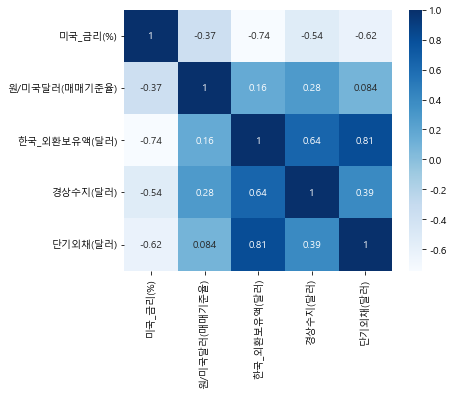

In [28]:
# 미국 금리
plt.figure(figsize=(6,4.8))
sns.heatmap(df_rel.corr(), annot = True, cmap='Blues')
plt.show()

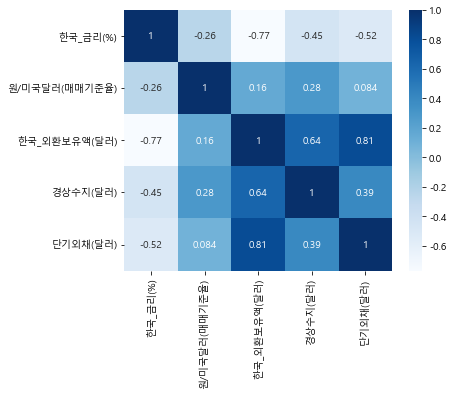

In [29]:
# 한국 금리
plt.figure(figsize=(6,4.8))
sns.heatmap(df_rel_k.corr(), annot = True, cmap='Blues')
plt.show()

### ③ 금리 지표에서 미국 금리를 선정한 이유

미국은 세계 경제에 가장 큰 영향력을 행사함

한국의 금리는 일반적으로 미국의 금리 변화와 유사한 추세를 보이므로 미국 금리와 한국 금리를 함께 선정하여 결과를 비교

### ④ 시사점

- 미국 금리 ↔ 경상수지(상관계수 -0.54)

미국 금리 상승 → 외화 유출 → 외환보유액 감소 → 원/달러 환율 상승 → 수출 증가 이익 < 수입 원자재 가격 상승 손해 → 경상수지 감소

- 경상수지 ↔ 한국 외환보유액(상관계수 0.64)

경상수지 흑자 → 수출 > 수입 → 외환보유액 증가

- 미국 금리 ↔ 한국 외환보유액(상관계수 -0.74)

미국 금리 상승 → 외화 유출 → 외환보유액 감소

## 5. 데이터 분석 시작

### - 분석의 편의를 위해 국가별 df 생성

In [30]:
# 국가별 df
df_usa = data.iloc[:, [0, 1, 2, 6, 9, 10, 14, 21, 26, 29, 31]]
df_japan = data.iloc[:, [0, 1, 3, 8, 11, 15, 18, 22, 27, 32]]
df_china = data.iloc[:, [0, 1, 4, 7, 12, 16, 19, 23, 33]]
df_korea = data.iloc[:, [0, 1, 5, 6, 7, 8, 13, 17, 20, 24, 25, 28, 29, 30, 34, 35, 36, 37, 38, 39]]

df_korea

,연월,년도,한국_금리(%),원/미국달러(매매기준율),원/위안(매매기준율),원/일본엔(100엔),한국(KOSPI)(1980.1.4=100),한국_소비자물가지수(2010=100),한국_외환보유액(달러),한국_경제성장률(%),경상수지(달러),한국_실업률(%),미국장단기(국채)금리차,외채비율(%),한국_1인당_국민소득(달러),무역수지(달러),총외채(달러),단기외채(달러),단기외채/외환보유액,단기외채/총외채
0,1995/01,1995,14.01,786.7,93.548540,791.65,925.56,58.87,25634400000000,9.6,-1209000000,2.1,0.34,0.470935,11820,-1201000000,80800000000,36200000000,1.790688,0.448020
1,1995/02,1995,14.01,786.0,93.659190,809.47,885.69,59.11,25752333000000,9.6,-1522000000,2.2,0.43,0.470935,11820,-1462000000,80800000000,36200000000,1.782530,0.448020
2,1995/03,1995,14.01,771.5,91.628691,862.25,931.78,59.71,25878700000000,9.6,-1562000000,2.1,0.40,0.470935,11820,-1668000000,80800000000,36200000000,1.771330,0.448020
3,1995/04,1995,14.01,761.8,90.676071,904.21,897.00,60.07,26551800000000,9.6,-748000000,2.0,0.47,0.470935,11820,-934000000,89200000000,41900000000,1.995662,0.469731
4,1995/05,1995,13.51,760.1,91.246764,913.58,882.50,60.19,27068000000000,9.6,-959000000,2.1,0.41,0.470935,11820,-1171000000,89200000000,41900000000,1.958120,0.469731
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
327,2022/04,2022,1.50,1269.4,192.030000,970.16,2695.05,123.71,425076761000000,0.7,-79000000,2.7,0.19,0.419000,34994,-2508000000,654100000000,174900000000,0.389274,0.267390
328,2022/05,2022,1.75,1245.8,186.400000,975.61,2685.90,124.53,423355152000000,0.7,3860000000,2.8,0.32,0.419000,34994,-1614000000,654100000000,174900000000,0.390654,0.267390
329,2022/06,2022,1.75,1292.9,192.750000,946.45,2332.64,125.29,414491928000000,0.7,5610000000,2.9,0.06,0.419000,34994,-2487000000,654100000000,174900000000,0.399061,0.267390
330,2022/07,2022,2.25,1304.0,193.350000,970.53,2451.50,125.90,415046922000000,0.7,1089000000,2.9,-0.22,0.419000,34994,-4805000000,662000000000,183800000000,0.419056,0.277644


### - 지표 비교를 위한 기간별 df 생성

1997년 외환위기, 2008년 금융위기 df 생성 → 전조 증상을 파악하기 위해 위기 직전의 데이터 위주로 추출

2021년 코로나로 인한 양적완화 시기 df 생성 → 경제 위기 df와의 지표 비교 목적

2022년 현재 df 생성

In [31]:
# <경제 위기>
# 1997년 외환위기
IMF_k = df_korea.iloc[10:36, :]
IMF_k.reset_index(drop=True, inplace=True)

# 2008년 금융위기
global_dep = df_korea.iloc[145:165, :]
global_dep.reset_index(drop=True, inplace=True)

# 2022년 현재
ty = df_korea.iloc[324:, :]
ty.reset_index(drop=True, inplace=True)


# <경제적 호황기>
# 나스닥, 코스피 최고점 기간(2021)
ly = df_korea.iloc[300:324, :]
ly.reset_index(drop=True, inplace=True)

## 1) 금리

ValueError: Could not interpret value `미국_금리(%)` for parameter `y`

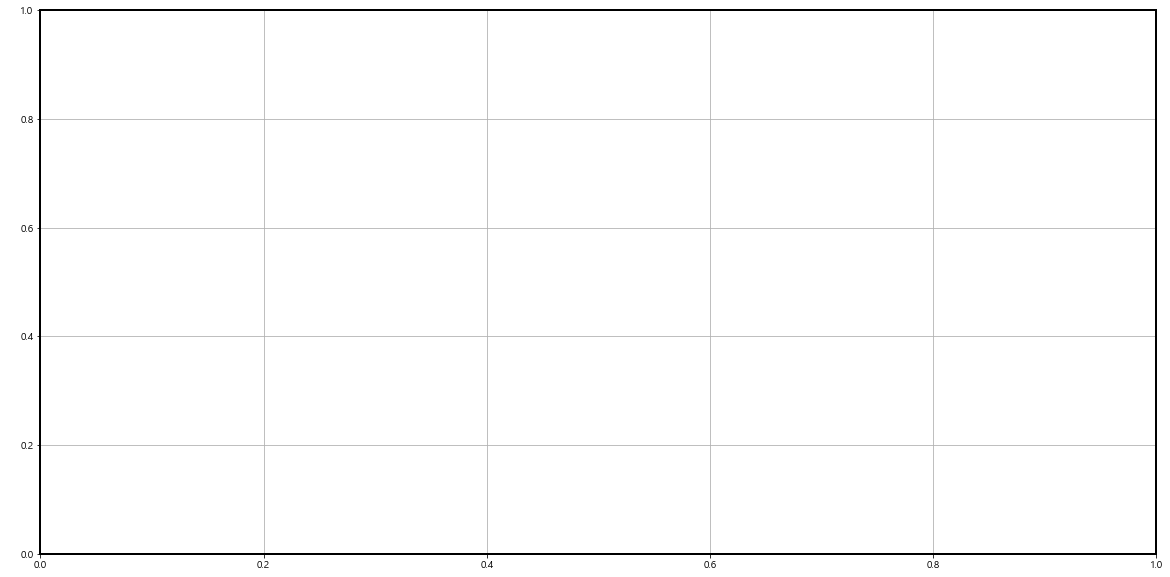

In [32]:
from matplotlib.ticker import MultipleLocator, IndexLocator, FuncFormatter
from matplotlib.dates import MonthLocator, DateFormatter

fig, ax = plt.subplots()
ax.set_ylabel(' ')

sns.lineplot(df_usa, x='연월', y='미국_금리(%)', errorbar=None, legend=True, ax=ax)
sns.lineplot(df_japan, x='연월', y='일본_금리(%)', errorbar=None, legend=True, ax=ax)
sns.lineplot(df_china, x='연월', y='중국_금리(%)', errorbar=None, legend=True, ax=ax)
sns.lineplot(df_korea, x='연월', y='한국_금리(%)', errorbar=None, legend=True, ax=ax)

plt.legend(['미국', '일본', '중국', '한국'], fontsize=20)
ax.xaxis.set_major_locator(MultipleLocator(12))
plt.xticks(rotation=45)
plt.xlabel('연월', fontsize=15)
plt.ylabel('금리', fontsize=15)
plt.rcParams["axes.grid"] = False
plt.show()

→ 세계적으로 금리가 상승하는 시기는 2008년 금융위기

→ 1997년 외환위기에는 한국의 금리만 급상승(약 26%)

### ① 최근 소비자 물가 급상승

In [ ]:
df_inf = data.iloc[250:324, :]
df_inf.reset_index(drop=True, inplace=True)

fig, axe = plt.subplots()
axe.set_ylabel(' ')

sns.lineplot(df_inf, x='년도', y='미국_소비자물가지수(2010=100)', errorbar=None, legend=True, color='r')
sns.lineplot(df_inf, x='년도', y='한국_소비자물가지수(2010=100)', errorbar=None, legend=True, color='g')
plt.legend(['미국_소비자물가지수(2010=100)', '한국_소비자물가지수(2010=100)'], fontsize=20, loc='upper left')
plt.xlabel('연월', fontsize=15)
plt.ylabel('물가지수', fontsize=15)
plt.show()

→ 코로나19의 대응책인 양적완화로 인한 고인플레이션 현상 발생 → 금리 인상

### ② 2022년 현재 금리 상황

미국 중앙은행 연방준비제도(Fed)의 기준금리 인상 : 제롬 파월 연준 의장이 2022년 9월 21일 기자회견을 열고 기준금리 0.75%p 인상을 발표함

연준은 금리를 3~3.25% 범위로 상향 조정하며, 앞으로도 금리 인상이 뒤따를 것을 시사함

In [ ]:
# 2020년 ~ 현재 미국금리
df_uint = df_usa.iloc[300:, :]
df_uint.reset_index(drop=True, inplace=True)

# 2020년 ~ 현재 한국금리
df_kint = df_korea.iloc[300:, :]
df_kint.reset_index(drop=True, inplace=True)

fig, axe = plt.subplots()
axe.set_ylabel(' ')

sns.lineplot(df_uint, x='연월', y='미국_금리(%)', errorbar=None, legend=True)
sns.lineplot(df_kint, x='연월', y='한국_금리(%)', errorbar=None, legend=True)
plt.xticks(rotation=45)
plt.legend(['미국', '한국'], fontsize=20)
plt.xlabel('연월', fontsize=15)
plt.ylabel('금리', fontsize=15)
plt.show()

→ 2008년 금융위기와 유사하게 금리가 급상승하는 추세를 보임

## 2) 환율

미국의 가파른 금리 인상의 영향으로 한국도 이에 맞춰 금리를 인상시키고 있음

그러나 한-미 기준금리에 차이가 벌어지면서 외화가 미국으로 빠져나갔고 이에 따라 환율이 가파르게 상승

일반적으로 환율의 상승은 수출을 증가시키지만, 한국과 같은 대외의존적 개방경제에서는 자본재 수입비용 증가 등으로 투자가 위축될 수 있음

### ① 1995 ~ 2022년 원/달러 환율 추이

In [ ]:
plt.figure(figsize=(20, 10))
sns.lineplot(df_korea, x='년도', y='원/미국달러(매매기준율)', errorbar=None, legend=True)
plt.title('한국 원/달러 환율 추이', fontsize=20)
plt.xlabel('연월', fontsize=15)          
plt.ylabel('원/미국달러', fontsize=15)
plt.show()

→ 실제로 원/달러 환율이 크게 오른 시기인 1997년, 2008년은 경제가 침체되는 시기와 일치함

→ 2022년 현재도 환율이 오르는 추세임

### ② 1997년, 2008년, 2022년 기간 별 환율 추이

In [ ]:
x1 = IMF_k['연월']                                       
y1 = IMF_k['원/미국달러(매매기준율)']
x2 = global_dep['연월']
y2 = global_dep['원/미국달러(매매기준율)']
x3 = ty['연월']
y3 = ty['원/미국달러(매매기준율)']

plt.figure()
sns.lineplot(data=IMF_k, x=x1, y=y1, errorbar=None, legend=True)
sns.lineplot(data=global_dep, x=x2, y=y2, errorbar=None, legend=True)
sns.lineplot(data=ty, x=x3, y=y3, errorbar=None, legend=True)

plt.legend(['1997년 외환위기', '2008년 금융위기', '2022년 현재'], loc='best', fontsize=15)
plt.xticks(rotation=45)
plt.show()

→ 1997년 외환위기의 지표와 2008년 금융위기의 지표 모두 증가하는 추세를 보임

→ 추세는 비슷하지만 두 시기간 환율 상승 정도는 큰 차이가 있음

→ 회귀분석시 두 시기를 분류하는 유의미한 지표가 될 것으로 예상됨

## 3) 경상수지

경상수지란 외국과 물건(재화)이나 서비스(용역) 등을 거래한 결과를 종합한 것으로, 외국과 실행한 거래 결과 벌어들인 수입에서 지출을 차감한 금액

경상수지가 흑자인 경우는 두 가지로 분류할 수 있음

- 수출과 수입이 모두 증가하는 상황에서 수출이 더 커서 발생하는 흑자

- 수출이 부진하지만 내수부진으로 수입이 더 부진하여 발생하는 불황형 흑자

### ① 1997년 외환위기

In [ ]:
# 데이터
x_category1 = IMF_k['연월']
y_category1 = IMF_k['경상수지(달러)']

# 시각화
plt.figure(figsize=(20,10))
colors = ['tab:blue','darkgrey','tab:blue','tab:blue','tab:blue','tab:blue','tab:blue','tab:blue','tab:blue','tab:blue','tab:blue','tab:blue','tab:blue','tab:blue','tab:blue','tab:blue','tab:blue','tab:blue','tab:blue','darkgrey','tab:blue','tab:blue','tab:blue','tab:blue','darkgrey','darkgrey']
xtick_label_position = list(range(len(x_category1)))       
plt.xticks(xtick_label_position, x_category1, rotation=45) 

# 바 차트 출력, 막대 색을 각각 지정한 색으로 설정
plt.bar(xtick_label_position, y_category1, color=colors)
 
plt.title('외환위기 시 한국 경상수지(달러)', fontsize=20)
plt.xlabel('연월', fontsize=15)          
plt.ylabel('경상수지(달러)', fontsize=15)
plt.show()

- 1997년 외환위기는 1997년 12월에 시작됨

→ 외환위기가 발생하기 직전의 상황을 보면 이미 경상수지가 악화되고 있음을 알 수 있음

- 1997년 12월에 경상수지가 급상승한 것은 수출 증가 덕분이 아닌 것으로 추측

→ 수출증가율 둔화와 내수부진으로 수입이 감소하여 발생한 불황형 흑자로 생각됨

### ② 2008년 금융위기

In [ ]:
# 데이터
x_category2 = global_dep['연월']                     
y_category2 = global_dep['경상수지(달러)']                  

# 시각화
plt.figure(figsize=(20,10))
colors = ['tab:blue','tab:blue','tab:blue','tab:blue','darkgrey','darkgrey','darkgrey','darkgrey','darkgrey','darkgrey','darkgrey','tab:blue','tab:blue','darkgrey','tab:blue','tab:blue','tab:blue','tab:blue','tab:blue','darkgrey','darkgrey','darkgrey','darkgrey']  ## 색상 지정
xtick_label_position = list(range(len(x_category2)))        
plt.xticks(xtick_label_position, x_category2, rotation=45)  

# 바 차트 출력, 막대 색을 각각 지정한 색으로 설정
plt.bar(xtick_label_position, y_category2, color=colors)
 
plt.title('금융위기(2008)_한국_경상수지(달러)', fontsize=20) 
plt.xlabel('연월', fontsize=15)          
plt.ylabel('경상수지(달러)', fontsize=15)
plt.show()

→ 2008년 금융위기는 그 시작을 2007년 4월 서브프라임 모기지 사태 혹은 2008년 9월로 보는 의견이 많음

→ 두 시작점 모두 그 직전의 상황에 경상수지가 악화되고 있음을 확인할 수 있음

### ③ 2020년 양적완화 시기

In [ ]:
# 데이터
x_category3 = ly['연월']
y_category3 = ly['경상수지(달러)']

# 시각화
plt.figure(figsize=(20,10))
colors = ['darkgrey','darkgrey','darkgrey','tab:blue','darkgrey','darkgrey','darkgrey','darkgrey','darkgrey','darkgrey','darkgrey','darkgrey','darkgrey','darkgrey','darkgrey','darkgrey','darkgrey','darkgrey','darkgrey','darkgrey','darkgrey','darkgrey','darkgrey','darkgrey']  ## 색상 지정
xtick_label_position = list(range(len(x_category3)))        
plt.xticks(xtick_label_position, x_category3, rotation=45)  

# 바 차트 출력, 막대 색을 각각 지정한 색으로 설정
plt.bar(xtick_label_position, y_category3, color=colors)
 
plt.title('코로나(2020)_발생_당시_한국_경상수지(달러)', fontsize=20) 
plt.xlabel('연월', fontsize=15)           
plt.ylabel('경상수지(달러)', fontsize=15);

→ 양적완화 정책으로 인해 경상수지가 좋은 상황임을 확인할 수 있음

### ④ 2022년 현재

In [ ]:
# 데이터
x_category4 = ty['연월']
y_category4 = ty['경상수지(달러)']

# 시각화
plt.figure(figsize=(20,10))
colors = ['darkgrey','darkgrey','darkgrey','darkgrey','darkgrey','darkgrey','darkgrey','tab:blue'] 
xtick_label_position = list(range(len(x_category4)))
plt.xticks(xtick_label_position, x_category4)       

# 바 차트 출력, 막대 색을 각각 지정한 색으로 설정
plt.bar(xtick_label_position, y_category4, color=colors)
 
plt.title('2022_한국_경상수지(달러)', fontsize=20) 
plt.xlabel('연월', fontsize=15)          
plt.ylabel('경상수지(달러)', fontsize=15)
plt.show()

→ 경제 위기(1997, 2008)가 발생하기 직전에는 경상수지가 악화되는 추세를 보임

→ 양적완화로 인한 호황(2021) 시기에는 경상수지가 좋은 상황임을 알 수 있음

→ 2022년 현재의 경상수지 지표는 경제 위기가 발생하기 직전의 상황과 비슷한 추세를 보임

## 4) 한국 외환보유액

### ① 1995 ~ 2022년 한국 외환보유액 추이

In [ ]:
plt.figure(figsize=(20, 10))
sns.lineplot(df_korea, x='년도', y='한국_외환보유액(달러)', errorbar=None, legend=True)
plt.title('한국 외환보유액 추이', fontsize=20)
plt.xlabel('연월', fontsize=15)
plt.ylabel('외환보유액', fontsize=15)
plt.show()

→ 그래프상 지난 30년간 한국의 외환보유액이 감소 추세를 보인 것은 1997년, 2008년

→ 1997년 외환위기, 2008년 금융위기와 기간이 일치함

→ 2022년 현재 또한 감소하는 추세를 보이고 있음

→ 감소하는 추세를 보임에도 외환보유액 절대치는 꾸준히 우상향 중

→ 외환보유액에 대한 보다 정확한 분석을 위해서는 단기외채와 연계할 필요가 있음

### ② 1997년 외환위기, 2008년 금융위기, 2022년 현재

In [ ]:
x1 = IMF_k['연월']          
y1 = IMF_k['한국_외환보유액(달러)']
x2 = global_dep['연월']
y2 = global_dep['한국_외환보유액(달러)']
x3 = ty['연월']
y3 = ty['한국_외환보유액(달러)']
 
fig, ax = plt.subplots(3, 1, constrained_layout=True)                 
ax[0].plot(x1,y1,color='r',label='1997(외환위기)_한국외환보유액(달러)')
ax[1].plot(x2,y2,color='b',label='2008(금융위기)_한국외환보유액(달러)')
ax[2].plot(x3,y3,color='k',label='2022(현재)_한국외환보유액(달러)')

ax[0].set_xticklabels(x1, rotation=45)
ax[1].set_xticklabels(x2, rotation=45)
ax[2].set_xticklabels(x3, rotation=45)

ax[0].legend(loc='upper right', fontsize=15)
ax[1].legend(loc='upper right', fontsize=15)
ax[2].legend(loc='upper right', fontsize=15)
plt.show()

→ 세 시기 모두 외환보유액이 감소함을 알 수 있음

## 5) 단기외채

In [ ]:
plt.figure(figsize=(20, 10))
sns.lineplot(df_korea, x='년도', y='단기외채(달러)', errorbar=None, legend=True)
plt.title('단기외채 추이', fontsize=20)
plt.xlabel('연월', fontsize=15)
plt.ylabel('단기외채', fontsize=15)
plt.show()

→ 단기외채가 급증하는 기간이 1997년 외환위기, 2008년 금융위기, 2022년 현재와 일치

→ 단기외채는 1년 이내에 상환해야 할 부채이기 때문에 상환할 수 있는 능력이 있는지 여부가 중요함

→ 상환할 능력이 없다면 국가신용도에 큰 악영향을 미치며 외환위기로 이어질 수 있음

→ 단기외채의 외환보유액 대비 비율을 활용하면 상환능력을 확인할 수 있음

### ① 단기외채 비율(단기외채/외환보유액)

앞서 분석한 외환보유액 지표와 연계할 경우 외환위기와 금융위기의 차이를 판단할 수 있는 지표를 만들 수 있음

단기외채/외환보유액 비율 : 국가가 단기외채를 갚을 능력이 있는지 확인할 수 있는 지표 → 외환위기와 밀접한 연관

이를 통해 외환위기가 발생할 가능성에 대해 판단할 수 있음

In [ ]:
df_fc_ratio = data[['연월','년도','단기외채/외환보유액']]
df_fc_ratio.head()

In [ ]:
fig, ax = plt.subplots()

sns.lineplot(df_fc_ratio, x='연월', y='단기외채/외환보유액', errorbar=None, legend=True, ax=ax)
ax.xaxis.set_major_locator(MultipleLocator(18))

plt.title('단기외채 비율(단기외채/외환보유액)', fontsize=20)
plt.xlabel('연월', fontsize=15)
plt.ylabel('단기외채 비율', fontsize=15)
plt.show()

→ 외환위기가 발생한 1997년에 단기외채의 외환보유액 대비 비율이 급상승하는 것을 확인

→ 2008년 금융위기에도 지표가 상승하지만 단기외채를 감당할만한 외환보유액을 확보하여 크게 상승하지는 않음

→ 두 시기의 차이를 명확하게 보여주기 때문에 회귀분석시 현재 상황을 판단하는 주요 지표가 될 것으로 예상됨

## 6. 데이터 분석 결론

### - 분석에 사용한 주요 지표

- 금리

- 환율

- 경상수지

- 외환보유액

- 단기외채

- 장단기 금리 역전

### - 1997년 외환위기와 2008년 금융위기 두 시기 모두 비슷한 추세를 보이는 지표

- 경상수지

- 외환보유액

### - 두 시기에 서로 다른 추세를 보이는 지표

- 금리

- 환율

- 단기외채/외환보유액 비율

→ 두 시기에 지표상 차이가 존재함

→ 회귀분석을 통해 현재 상황이 단기적 위기일지, 외환위기 혹은 금융위기에 가까운 심각한 경제 위기일지 예측할 것

# Ⅳ. 회귀분석

기존의 df에 새로운 컬럼을 추가

→ 회귀분석을 위해서는 정답이 되는 y 컬럼이 필요함

→ 현재의 경제적 상황을 판단하는 데 필요한 지표는 여러가지가 있음

→ 그 중에서 하나의 지표만으로는 정확한 경제적 상황을 판단할 수 없음

→ 따라서 새로운 컬럼을 생성하여 지난 30년의 기간의 리스크 수준을 세 종류로 분류하여 회귀분석을 실시

→ 리스크 수준(y)을 1997년 외환위기는 1, 2008년 금융위기는 2, 나머지 대부분의 기간은 0으로 설정

→ 회귀분석 시작

In [67]:
# '리스크 분류' 컬럼 추가
data['리스크_분류'] = 0
data

,연월,년도,미국_금리(%),일본_금리(%),중국_금리(%),한국_금리(%),원/미국달러(매매기준율),원/위안(매매기준율),원/일본엔(100엔),달러_인덱스,미국(NASDAQ)(1980.1.4=100),일본(NIKKEI)(1980.1.4=100),중국(SHCOMP)(1980.1.4=100),한국(KOSPI)(1980.1.4=100),미국_소비자물가지수(2010=100),일본_소비자물가지수(2010=100),중국_소비자물가지수(2010=100),한국_소비자물가지수(2010=100),일본_외환보유액(달러),중국_외환보유액(달러),한국_외환보유액(달러),미국_경제성장률(%),일본_경제성장률(%),중국_경제성장률(%),한국_경제성장률(%),경상수지(달러),미국_실업률(%),일본_실업률(%),한국_실업률(%),미국장단기(국채)금리차,외채비율(%),미국_1인당_국민소득(달러),일본_1인당_국민소득(달러),중국_1인당_국민소득(달러),한국_1인당_국민소득(달러),무역수지(달러),총외채(달러),단기외채(달러),단기외채/외환보유액,단기외채/총외채,리스크_분류
0,1995/01,1995,5.500,1.75,12.06,14.01,786.7,93.548540,791.65,88.030,755.20,18649.82,562.59,925.56,68.93,101.33,71.41,58.87,183250000000,75377000000,25634400000000,2.7,2.6,11.0,9.6,-1209000000,5.6,3.0,2.1,0.34,0.470935,29040,42570,540,11820,-1201000000,80800000000,36200000000,1.790688,0.448020,0
1,1995/02,1995,6.000,1.75,12.06,14.01,786.0,93.659190,809.47,85.920,793.74,17053.43,549.26,885.69,69.20,101.02,72.06,59.11,183250000000,75377000000,25752333000000,2.7,2.6,11.0,9.6,-1522000000,5.4,3.0,2.2,0.43,0.470935,29040,42570,540,11820,-1462000000,80800000000,36200000000,1.782530,0.448020,0
2,1995/03,1995,6.000,1.75,12.06,14.01,771.5,91.628691,862.25,82.080,817.21,16139.95,646.92,931.78,69.43,100.91,72.26,59.71,183250000000,75377000000,25878700000000,2.7,2.6,11.0,9.6,-1562000000,5.4,3.1,2.1,0.40,0.470935,29040,42570,540,11820,-1668000000,80800000000,36200000000,1.771330,0.448020,0
3,1995/04,1995,6.000,1.00,12.06,14.01,761.8,90.676071,904.21,81.920,843.98,16806.75,579.93,897.00,69.66,101.23,73.56,60.07,183250000000,75377000000,26551800000000,2.7,2.6,11.0,9.6,-748000000,5.8,3.1,2.0,0.47,0.470935,29040,42570,540,11820,-934000000,89200000000,41900000000,1.995662,0.469731,0
4,1995/05,1995,6.000,1.00,12.06,13.51,760.1,91.246764,913.58,82.670,864.58,15436.79,700.51,882.50,69.80,101.43,74.17,60.19,183250000000,75377000000,27068000000000,2.7,2.6,11.0,9.6,-959000000,5.6,3.0,2.1,0.41,0.470935,29040,42570,540,11820,-1171000000,89200000000,41900000000,1.958120,0.469731,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
327,2022/04,2022,0.375,-0.10,3.70,1.50,1269.4,192.030000,970.16,102.963,12334.64,26847.90,3047.06,2695.05,132.59,107.05,131.91,123.71,1322193000000,3119720000000,425076761000000,-0.6,0.9,-2.6,0.7,-79000000,3.6,2.5,2.7,0.19,0.419000,76027,39243,14096,34994,-2508000000,654100000000,174900000000,0.389274,0.267390,0
328,2022/05,2022,0.875,-0.10,3.70,1.75,1245.8,186.400000,975.61,101.766,12081.39,27279.80,3186.43,2685.90,134.05,107.37,131.65,124.53,1329651000000,3127780000000,423355152000000,-0.6,0.9,-2.6,0.7,3860000000,3.6,2.6,2.8,0.32,0.419000,76027,39243,14096,34994,-1614000000,654100000000,174900000000,0.390654,0.267390,0
329,2022/06,2022,1.625,-0.10,3.70,1.75,1292.9,192.750000,946.45,104.464,11028.74,26393.04,3398.62,2332.64,135.89,107.37,131.65,125.29,1311254000000,3071272000000,414491928000000,-0.6,0.9,-2.6,0.7,5610000000,3.6,2.6,2.9,0.06,0.419000,76027,39243,14096,34994,-2487000000,654100000000,174900000000,0.399061,0.267390,0
330,2022/07,2022,2.375,-0.10,3.70,2.25,1304.0,193.350000,970.53,105.779,12390.69,27801.64,3253.24,2451.50,135.87,107.89,132.29,125.90,1323034000000,3104071000000,415046922000000,-0.6,0.9,-2.6,0.7,1089000000,3.5,2.6,2.9,-0.22,0.419000,76027,39243,14096,34994,-4805000000,662000000000,183800000000,0.419056,0.277644,0


## - 1997년 외환위기 기간(1997.12 ~ 2001.8) → 리스크 분류 1 입력

In [68]:
data['리스크_분류'][35:80] = 1

## - 2008년 외환위기 기간(2007.4 ~ 2009.4) → 리스크 분류 2 입력

In [69]:
data['리스크_분류'][147:172] = 2

In [70]:
# 한국
df_regression = data.iloc[:, [0, 1, 2, 3, 4, 5, 6, 7, 8, 13, 20, 24, 25, 29, 35, 37, 38, 40]]
df_regression

,연월,년도,미국_금리(%),일본_금리(%),중국_금리(%),한국_금리(%),원/미국달러(매매기준율),원/위안(매매기준율),원/일본엔(100엔),한국(KOSPI)(1980.1.4=100),한국_외환보유액(달러),한국_경제성장률(%),경상수지(달러),미국장단기(국채)금리차,무역수지(달러),단기외채(달러),단기외채/외환보유액,리스크_분류
0,1995/01,1995,5.500,1.75,12.06,14.01,786.7,93.548540,791.65,925.56,25634400000000,9.6,-1209000000,0.34,-1201000000,36200000000,1.790688,0
1,1995/02,1995,6.000,1.75,12.06,14.01,786.0,93.659190,809.47,885.69,25752333000000,9.6,-1522000000,0.43,-1462000000,36200000000,1.782530,0
2,1995/03,1995,6.000,1.75,12.06,14.01,771.5,91.628691,862.25,931.78,25878700000000,9.6,-1562000000,0.40,-1668000000,36200000000,1.771330,0
3,1995/04,1995,6.000,1.00,12.06,14.01,761.8,90.676071,904.21,897.00,26551800000000,9.6,-748000000,0.47,-934000000,41900000000,1.995662,0
4,1995/05,1995,6.000,1.00,12.06,13.51,760.1,91.246764,913.58,882.50,27068000000000,9.6,-959000000,0.41,-1171000000,41900000000,1.958120,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
327,2022/04,2022,0.375,-0.10,3.70,1.50,1269.4,192.030000,970.16,2695.05,425076761000000,0.7,-79000000,0.19,-2508000000,174900000000,0.389274,0
328,2022/05,2022,0.875,-0.10,3.70,1.75,1245.8,186.400000,975.61,2685.90,423355152000000,0.7,3860000000,0.32,-1614000000,174900000000,0.390654,0
329,2022/06,2022,1.625,-0.10,3.70,1.75,1292.9,192.750000,946.45,2332.64,414491928000000,0.7,5610000000,0.06,-2487000000,174900000000,0.399061,0
330,2022/07,2022,2.375,-0.10,3.70,2.25,1304.0,193.350000,970.53,2451.50,415046922000000,0.7,1089000000,-0.22,-4805000000,183800000000,0.419056,0


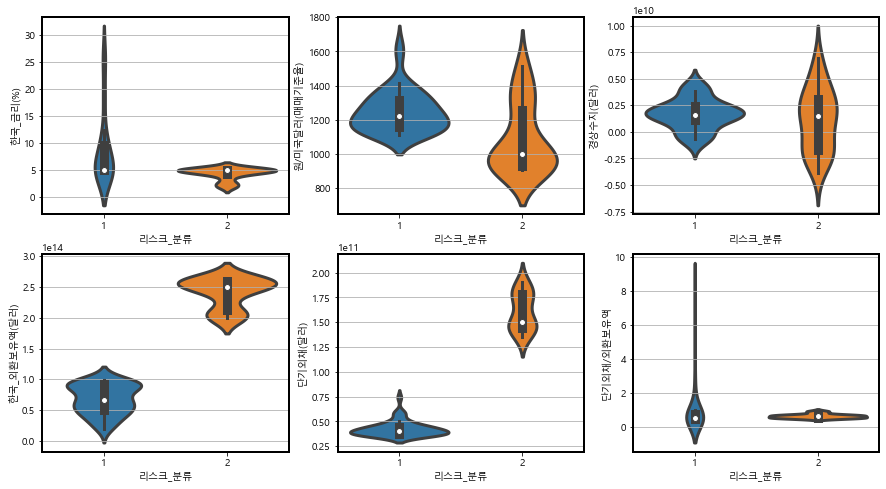

In [97]:
data_temp1 = data[data['리스크_분류'] == 1]
data_temp2 = data[data['리스크_분류'] == 2]
data_temp = pd.concat([data_temp1, data_temp2])

fig, axes = plt.subplots(2, 3, figsize = (15, 8))

sns.violinplot(x='리스크_분류', y='한국_금리(%)',data=data_temp, ax = axes[0, 0])
sns.violinplot(x='리스크_분류', y='원/미국달러(매매기준율)',data=data_temp, ax = axes[0, 1])
sns.violinplot(x='리스크_분류', y='경상수지(달러)',data=data_temp, ax = axes[0, 2])
sns.violinplot(x='리스크_분류', y='한국_외환보유액(달러)',data=data_temp, ax=axes[1, 0])
sns.violinplot(x='리스크_분류', y='단기외채(달러)',data=data_temp, ax = axes[1, 1])
sns.violinplot(x='리스크_분류', y='단기외채/외환보유액',data=data_temp, ax = axes[1, 2])
plt.show()

## 1. 훈련(train), 검증(valid), 테스트(test) 분류

→ 훈련데이터를 다시 7.5 : 2.5 비율의 훈련데이터(train_2)와 검증데이터(valid)로 나눔

→ 학습을 진행하여 이를 바탕으로 테스트데이터(test)의 y값(외환위기 리스크 수준)을 예측

In [71]:
x_train = df_regression.iloc[:251, 2:-1]
x_test = df_regression.iloc[251:, 2:-1]

y_train = df_regression.iloc[:251, -1]
y_test = df_regression.iloc[251:, -1]

In [72]:
from sklearn.model_selection import train_test_split
x_train_2, x_val, y_train_2, y_val = train_test_split(x_train, y_train, random_state=2)

## 2. 회귀분석 시작

In [73]:
# 0 : 평소
# 1 : 외환위기(1997.12 ~ 2001.8 → IMF 기간 지정)
# 2 : 금융위기(2007.4 ~ 2009.4 → 대침체 기간 지정)

In [74]:
# 랜덤포레스트
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(random_state=2)
model.fit(x_train_2, y_train_2)

pred_train = model.predict(x_train_2)
pred_test = model.predict(x_val)

prob_train = model.predict_proba(x_train_2)
prob_test = model.predict_proba(x_val)

print('test score : ', model.score(x_test, y_test))

pred_test_2 = model.predict(x_test)

test score :  1.0


In [ ]:
pred_test_2_df = pd.DataFrame(pred_test_2)
pred_test_2_df.columns = ['리스크 분류(0:평시, 1:외환위기, 2:금융위기)']

df_data = pd.DataFrame(df_regression['연월'].iloc[251:].values)
df_data.columns = ['연월']

df_pred = pd.concat([df_data, pred_test_2_df], axis=1)
df_pred.tail(10)

→ 2022년 현재의 리스크 수준을 0(평시)으로 분류

→ 각 리스크 분류에 대한 확률을 확인해보자

In [ ]:
# 랜덤포레스트 predict_proba
prob_test_2 = model.predict_proba(x_test)

prob_test_2_df = pd.DataFrame(prob_test_2)
prob_test_2_df.columns = ['평시', '외환위기 리스크', '금융위기 리스크']

df_data = pd.DataFrame(df_regression['연월'].iloc[251:].values)
df_data.columns = ['연월']

df_prob = pd.concat([df_data, prob_test_2_df], axis=1)
df_prob

In [ ]:
plt.figure(figsize=(20, 10))
sns.lineplot(data=df_prob, x='연월', y='평시', c='r', errorbar=None, legend=True)
sns.lineplot(data=df_prob, x='연월', y='외환위기 리스크', c='b', errorbar=None, legend=True)
sns.lineplot(data=df_prob, x='연월', y='금융위기 리스크', c='g', errorbar=None, legend=True)

plt.title('리스크별 확률', fontsize=20)
plt.xlabel('기간', fontsize=20)
plt.ylabel('위험성', fontsize=20)
plt.legend(['평시', '외환위기', '금융위기'], fontsize=20, loc='best')
plt.xticks(rotation=90)
plt.show()

→ 최근(2022년 8월 데이터)으로 갈수록 2(금융위기)의 확률이 급격하게 증가하고 있음을 알 수 있음

→ 외환위기보다는 2008년 금융위기와 유사한 상황이 될 위험성이 높음

→ 금융위기 리스크가 시간이 지날수록 증가하는 추세를 보이기 때문에 단기적인 위기라고 속단하기는 어려움

## 3. 회귀분석 결과에 영향을 준 지표들

In [ ]:
# 그리드 서치
from sklearn.model_selection import GridSearchCV
param_grid = {'random_state' : range(1, 50, 1)}
gridsearch = GridSearchCV(RandomForestClassifier(), param_grid, scoring='accuracy', return_train_score=True, cv=5)
gridsearch.fit(x_train, y_train)

print('최적의 파라미터 : ', gridsearch.best_params_)
print('최적의 정확도 : ', gridsearch.best_score_)

In [ ]:
# 중요 feature
# df_regression 컬럼에서 날짜 컬럼과 class 컬럼 제외
df_columns = list(df_regression.columns)[2:-1]

best = gridsearch.best_estimator_
a = best.feature_importances_
b = df_columns

feature_df = pd.DataFrame(data=a, index=b)
feature_df.columns = ['feature_importance']
feature_df = feature_df.sort_values(by='feature_importance', ascending=False)
feature_df_10 = feature_df.iloc[:10, :]
feature_df_10

In [ ]:
# 중요 feature 시각화
fig = plt.figure(figsize=(8,8))
fig.set_facecolor('white')
ax = fig.add_subplot() # 프레임 생성
 
explode = [0.1,0.1,0.1,0.1,0,0.1,0,0,0,0] # 부각되는 정도를 결정

ax.pie(feature_df_10.feature_importance, # 파이차트 출력
       explode = explode, # 단기외채(달러)와 한국_금리(%)를 부각되게 함
       labels=feature_df_10.index,
       startangle=90, # 시작점을 90도(degree)로 지정
       counterclock=False, # 시계 방향으로 출력
       autopct=lambda p : '{:.2f}%'.format(p)) # 퍼센티지 출력
 
plt.show()

→ 분석을 시작 할 때 주요 지표로 선정한 지표 : 금리, 환율, 경상수지, 외환보유액, 단기외채(단기외채 비율)

→ 분석에 사용한 주요 지표와 회귀분석 결과에 영향을 미친 지표들이 상당 부분 일치하는 결과를 보임

# V. 결론

앞서 시각화와 회귀분석을 통해 예측한 결과 → 새로운 경제 위기를 직면할 가능성이 높아지고 있다는 것

경제 지표 중에는 경기침체에 대한 예측력이 매우 높은 '장단기 금리차'라는 지표가 있음

이 지표가 보여주는 미래의 상황이 앞서 분석한 결과와 얼마나 일치할지 확인해보자

## 1. 미국의 장단기 금리차 역전
장단기 금리 역전 : 장기금리가 단기금리보다 낮아지는 현상

주요 금융시장 및 경제지표 중에서 경기침체에 대한 예측력이 가장 정확한 지표 중 하나

실제로 미국에서는 1960년 이후에 발생한 모든 경기침체에 앞서 장단기 금리가 역전된 바 있음

Bauer and Mertens(2018) : 1950년 이후 모든 경기침체기에 장단기 금리(10년 금리 - 1년 금리) 역전이 6개월에서 24개월가량 선행한 것으로 분석

In [ ]:
fig, axe1 = plt.subplots()
axe2 = axe1.twinx()

c1 = sns.lineplot(ax = axe1, data = df_usa, x = '연월', y = '미국장단기(국채)금리차', errorbar=None, legend=True, color='b').axhline(0, ls='--', color='r')
c2 = sns.lineplot(ax = axe2, data = df_usa, x = '연월', y = '미국(NASDAQ)(1980.1.4=100)', errorbar=None, legend=True, color='tab:blue')

axe1.legend(['미국 장단기 금리차'], loc = 'upper left', fontsize=20)
axe2.legend(['NASDAQ'], loc = 'upper right', fontsize=20)

axe1.xaxis.set_major_locator(MultipleLocator(18))

axe1.set_ylabel('미국 장단기 금리차', fontsize=15)
axe2.set_ylabel('미국(NASDAQ)(1980.1.4=100)', fontsize=15)
plt.rcParams["axes.grid"] = False
plt.show()

## 2. 시사점

2000년 : 장단기 금리차 역전(-0.11% ~ -0.47%) → 2000 ~ 2002년 나스닥 폭락(-75%)

2006년 : 장단기 금리차 역전(-0.01% ~ -0.16%) → 2008년 나스닥 폭락 (-51%)

2019년 : 8월 장단기 금리차 0 → 향후 6 ~ 24개월 이내 경기침체를 예상

2020년 : 하지만 2020년 초 코로나 위기 대응책으로 미국 정부에서 양적완화를 실시하여 버블 경제가 시작되면서 경기침체가 잠시 지연됨

2021년 : 코로나 위기 대응책인 양적완화의 부작용으로 2021년 말부터 현재까지 나스닥 시장의 거품이 빠져 -28%를 기록

2022년 7월 : 장단기 금리차가 역전되기 시작했으므로 향후 경기침체의 폭이 더 커질 것으로 예상됨

## 3. 마무리

회귀분석으로 얻은 결과와 미국 장단기 금리 지표 시각화로 얻은 결과를 통해 

가까운 미래에 한국은 새로운 경제 위기에 직면할 가능성이 높다는 것을 확인함

하지만 대외채무를 상환할 능력이 부족하여 1997년 외환위기와 같은 경제 위기에 직면한다기보다는

2008년 금융위기와 같이 전세계적인 시류에 휩쓸릴 가능성이 높다고 할 수 있음